In [ ]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

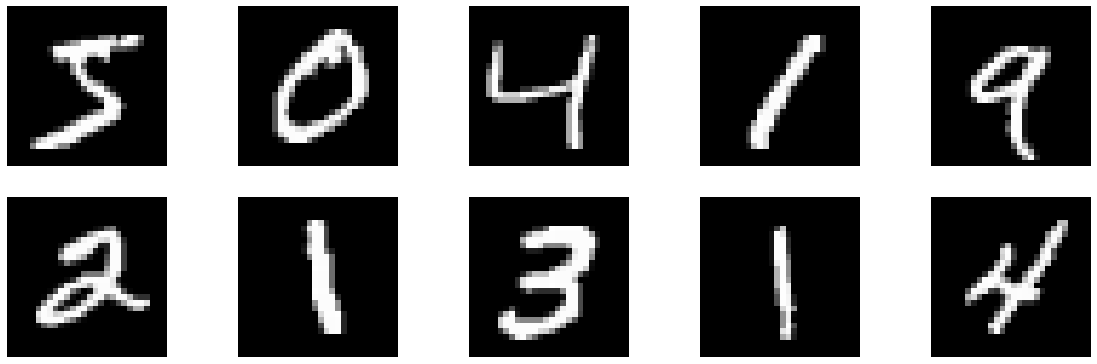

In [ ]:
# X_train = X_train.reshape(X_train.shape[0],28,28,1)
# X_test = X_test.reshape(X_test.shape[0],28,28,1)
fig = plt.figure(figsize=(20, 17))

for i in range(10): 
  fig.add_subplot(5, 5, i+1)
  plot_image(X_train[i])

In [ ]:
X_train, X_test = X_train[:-5000], X_train[-5000:]
y_train, y_test = y_train[:-5000], y_train[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
# X_test = (X_test - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
# X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    # kernel_size = 7 (7x7)
    # filter 
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

tf.Tensor(
[[[ 0.04212566]
  [ 0.00501809]
  [ 0.00284377]
  [-0.004184  ]
  [-0.01615958]
  [-0.03101738]
  [-0.03046397]]

 [[ 0.01089394]
  [-0.01646173]
  [ 0.03822539]
  [ 0.00850239]
  [-0.03789612]
  [ 0.00345335]
  [-0.00592661]]

 [[ 0.02639282]
  [ 0.03236814]
  [ 0.03893594]
  [ 0.02287744]
  [ 0.03074055]
  [ 0.01614831]
  [ 0.04257681]]

 [[-0.03666362]
  [ 0.02316773]
  [-0.01984269]
  [-0.03775214]
  [-0.03928512]
  [ 0.003282  ]
  [ 0.03169981]]], shape=(4, 7, 1), dtype=float32)


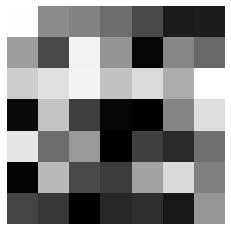

In [ ]:
layer_1 = model.get_layer(index=0)
conv_matrix = layer_1.kernel

# print first 4 kernels
print(conv_matrix[:,:,:,0][:4])

# print(conv_matrix)
# print(conv_matrix[:,:,0,0].shape)

# First 4



plot_image(conv_matrix[:,:,0,0])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 49s 9ms/step - loss: 0.7430 - accuracy: 0.7569 - val_loss: 0.0659 - val_accuracy: 0.9808
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1243 - accuracy: 0.9703 - val_loss: 0.0822 - val_accuracy: 0.9834
Epoch 3/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.0949 - accuracy: 0.9785 - val_loss: 0.0731 - val_accuracy: 0.9864
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0798 - accuracy: 0.9812 - val_loss: 0.1240 - val_accuracy: 0.9906
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0754 - accuracy: 0.9836 - val_loss: 0.0382 - val_accuracy: 0.9910
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0629 - accuracy: 0.9866 - val_loss: 0.0407 - val_accuracy: 0.9922
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0624 - accuracy: 0.9862 - val_loss: 0.0485 - val_ac

In [ ]:
print("Accuracy is: ", score[1])

Accuracy is:  0.9914000034332275


tf.Tensor(
[[[-0.01541959]
  [-0.02863043]
  [ 0.0131449 ]
  [ 0.00778558]
  [-0.01834625]
  [-0.02008801]
  [-0.03797168]]

 [[ 0.02051699]
  [ 0.00651772]
  [-0.01855556]
  [-0.010692  ]
  [-0.05000893]
  [-0.02273535]
  [-0.05991971]]

 [[-0.02308654]
  [-0.02812459]
  [-0.00903016]
  [-0.01469419]
  [ 0.00429472]
  [ 0.01215611]
  [-0.02819557]]

 [[-0.03267869]
  [ 0.00920694]
  [-0.00282815]
  [ 0.03805467]
  [ 0.05218638]
  [ 0.04362494]
  [ 0.0060495 ]]], shape=(4, 7, 1), dtype=float32)


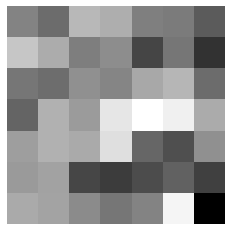

In [ ]:
layer_1 = model.get_layer(index=0)
conv_matrix = layer_1.kernel
# print(conv_matrix)
# print(conv_matrix[:,:,0,0].shape)

# First 4
print(conv_matrix[:,:,:,0][:4])

plot_image(conv_matrix[:,:,0,0])

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test)

print(y_test.shape, y_pred.shape)
confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(5000,) (5000,)


array([[486,   0,   0,   1,   0,   0,   0,   0,   1,   1],
       [  0, 525,   3,   0,   0,   0,   0,   2,   0,   0],
       [  0,   0, 490,   2,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 508,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0, 487,   0,   0,   3,   0,   9],
       [  0,   0,   1,   0,   0, 452,   4,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1, 481,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 563,   0,   0],
       [  0,   0,   1,   2,   0,   1,   0,   0, 489,   1],
       [  0,   0,   0,   1,   1,   2,   0,   2,   1, 476]])

Part 2

In [ ]:
(X_train_new, y_train_new), (X_test_new, y_test_new) = mnist.load_data() 

In [ ]:
from scipy import ndimage, misc
import random

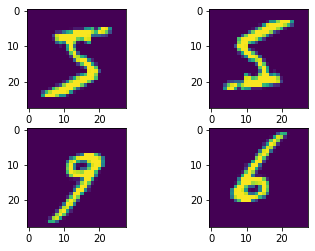

In [ ]:
# random
sample2 = ndimage.rotate(X_train_new[0], 180, reshape=False)
sample3 = ndimage.rotate(X_train_new[33], 180, reshape=False)


f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(X_train_new[0])
axarr[0,1].imshow(sample2)
axarr[1,0].imshow(X_train_new[33])
axarr[1,1].imshow(sample3)

In [ ]:
for n in range(len(X_train_new)):
  X_train_new[n] = ndimage.rotate(X_train_new[n], random.randint(0, 360), reshape=False)

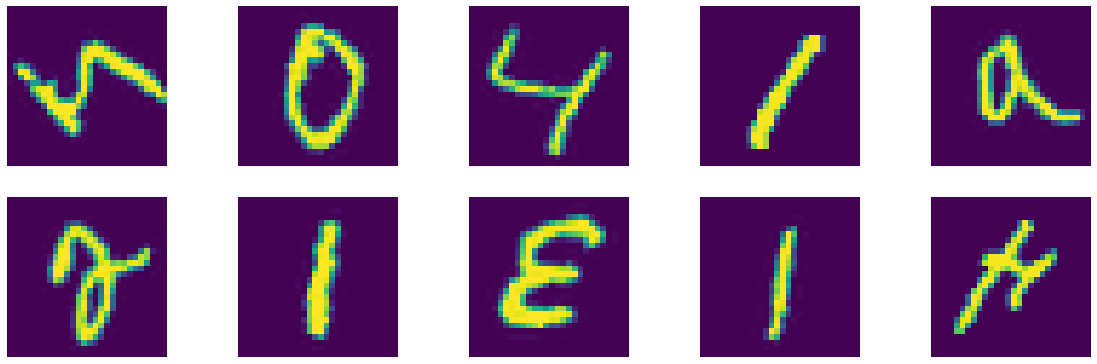

In [ ]:
fig = plt.figure(figsize=(20, 17))

for i in range(10): 
  fig.add_subplot(5, 5, i+1)
  # plot_image(X_train_new[i])
  plt.imshow(X_train_new[i].squeeze())
  plt.axis("off")

In [ ]:
X_train_new, X_test_new = X_train_new[:-5000], X_train_new[-5000:]
y_train_new, y_test_new = y_train_new[:-5000], y_train_new[-5000:]

X_mean_new = X_train_new.mean(axis=0, keepdims=True)
X_std_new = X_train_new.std(axis=0, keepdims=True) + 1e-7
X_train_new = (X_train_new - X_mean_new) / X_std_new
# X_test = (X_test - X_mean) / X_std
X_test_new = (X_test_new - X_mean_new) / X_std_new

X_train_new = X_train_new[..., np.newaxis]
# X_valid = X_valid[..., np.newaxis]
X_test_new = X_test_new[..., np.newaxis]

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    # kernel_size = 7 (7x7)
    # filter 
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 256)        

tf.Tensor(
[[[-0.01782415]
  [-0.01267819]
  [ 0.01240696]
  [-0.0290932 ]
  [ 0.00948222]
  [-0.03052129]
  [ 0.04192814]]

 [[ 0.00664373]
  [-0.01291291]
  [ 0.02589324]
  [-0.03840507]
  [-0.03134122]
  [-0.01321346]
  [ 0.00305461]]

 [[ 0.03369104]
  [-0.00120866]
  [-0.03441635]
  [ 0.03547602]
  [ 0.0316453 ]
  [ 0.02963668]
  [-0.02188989]]

 [[ 0.00264915]
  [ 0.04174979]
  [-0.01988794]
  [ 0.00166678]
  [ 0.0039497 ]
  [ 0.00659783]
  [ 0.03435083]]], shape=(4, 7, 1), dtype=float32)


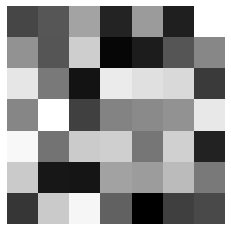

In [ ]:
layer_1 = model.get_layer(index=0)
conv_matrix = layer_1.kernel
# print(conv_matrix)
# print(conv_matrix[:,:,0,0].shape)

# First 4
print(conv_matrix[:,:,:,0][:4])

plot_image(conv_matrix[:,:,0,0])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_new, y_train_new, epochs=10, validation_data=(X_test_new, y_test_new))
score = model.evaluate(X_test_new, y_test_new)

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 1.8880 - accuracy: 0.3081 - val_loss: 0.3177 - val_accuracy: 0.9038
Epoch 2/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4778 - accuracy: 0.8622 - val_loss: 0.2183 - val_accuracy: 0.9398
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3332 - accuracy: 0.9067 - val_loss: 0.1686 - val_accuracy: 0.9500
Epoch 4/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.2595 - accuracy: 0.9277 - val_loss: 0.1525 - val_accuracy: 0.9558
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2350 - accuracy: 0.9359 - val_loss: 0.1580 - val_accuracy: 0.9572
Epoch 6/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.2120 - accuracy: 0.9423 - val_loss: 0.1558 - val_accuracy: 0.9582
Epoch 7/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1886 - accuracy: 0.9469 - val_loss: 0.1358 - val_ac

tf.Tensor(
[[[ 0.06586865]
  [ 0.0621245 ]
  [ 0.03422519]
  [-0.01787367]
  [-0.01445916]
  [-0.00772612]
  [ 0.04622101]]

 [[ 0.01327792]
  [-0.0042849 ]
  [-0.00121417]
  [ 0.00475409]
  [-0.00249342]
  [ 0.00294329]
  [-0.00159403]]

 [[-0.04096974]
  [-0.01830072]
  [-0.06858459]
  [-0.05830559]
  [-0.02280284]
  [ 0.03238465]
  [ 0.05562493]]

 [[-0.01522267]
  [-0.03500529]
  [-0.14281803]
  [-0.14863084]
  [-0.10321918]
  [-0.05058501]
  [ 0.00948266]]], shape=(4, 7, 1), dtype=float32)


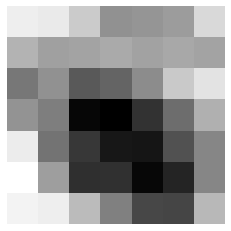

In [ ]:
layer_1 = model.get_layer(index=0)
conv_matrix = layer_1.kernel
# print(conv_matrix)
# print(conv_matrix[:,:,0,0].shape)

# First 4
print(conv_matrix[:,:,:,0][:4])

plot_image(conv_matrix[:,:,0,0])

In [ ]:
y_pred_new = model.predict_classes(X_test_new)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("Accuracy for rotated images", score[1])

Accuracy for rotated images 0.9613999724388123


In [ ]:
# new confusion matrix 
from sklearn.metrics import confusion_matrix

print(y_test_new.shape, y_pred_new.shape)
confusion_matrix(y_test_new, y_pred_new)

(5000,) (5000,)


array([[483,   0,   1,   0,   0,   0,   1,   0,   3,   1],
       [  0, 520,   2,   0,   4,   0,   0,   3,   1,   0],
       [  1,   0, 480,   0,   0,   0,   1,   7,   4,   0],
       [  0,   0,   2, 499,   1,   2,   0,   1,   4,   0],
       [  0,   2,   0,   0, 488,   1,   0,   2,   0,   6],
       [  0,   1,   0,   5,   1, 433,   7,   0,   7,   4],
       [  3,   1,   0,   0,   2,   2, 454,   9,   2,   9],
       [  2,   2,   6,   0,  10,   0,   5, 534,   0,   4],
       [  2,   1,   0,   2,   0,   1,   1,   0, 484,   3],
       [  1,   0,   0,   0,   7,  16,  20,   0,   7, 432]])

# Some Testing of the new dataset and the model

In [ ]:
# We use .squeeze to reshape the X_test_new array since it cannot be plotted like that
print("Previous shape: ", X_test_new.shape)

X_test_new = X_test_new.squeeze()

print("New shape: ", X_test_new.shape)


Previous shape:  (5000, 28, 28, 1)
New shape:  (5000, 28, 28)


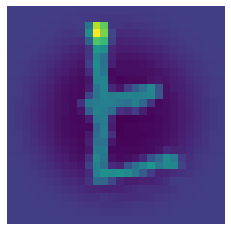

7


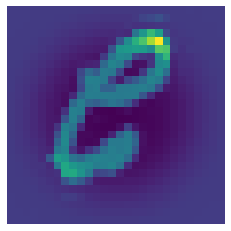

8


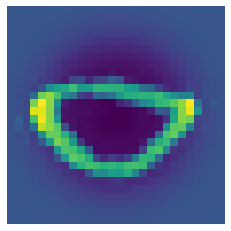

0


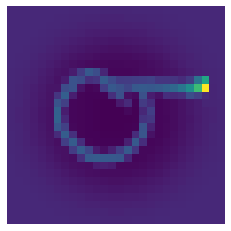

9


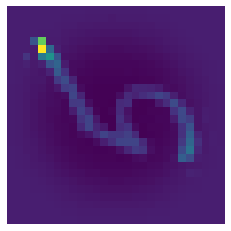

5


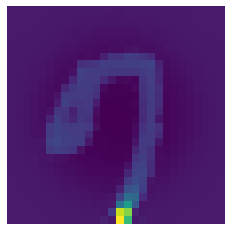

6


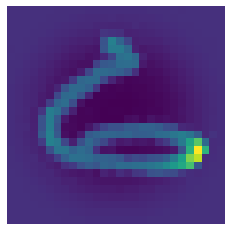

6


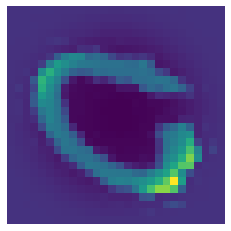

0


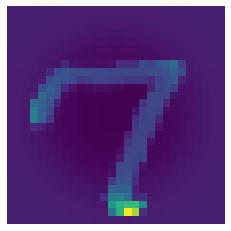

7


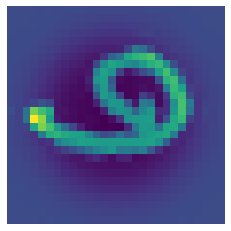

6


In [ ]:
# We change the plotting method due to image contrast issues

for n in range(10):
  rand_plot = random.randint(0, 5001)
  plt.imshow(X_test_new[rand_plot])
  plt.axis("off")
  plt.show()
  print(y_pred_new[rand_plot])

